In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import datetime
import matplotlib
%matplotlib inline


from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
jtplot.style(context='talk', fscale=1.5, spines=False, gridlines='')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'w'
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

#import plotly offline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Test website data sciences- 2019.csv', sep=',',delimiter='\t')
data.head()

,Month,May-15,juil-15,Aug-15,sept-15,oct-15,nov-15,Dec-15,janv-16,Feb-16,mars-16,Apr-16,May-16,juin-16,juil-16,Aug-16,sept-16,oct-16,nov-16,Dec-16,janv-17,Feb-17,mars-17,Apr-17,May-17,juin-17,juil-17,Aug-17,sept-17,oct-17,nov-17,Dec-17,janv-18,Feb-18,mars-18,Apr-18,May-18
0,Traffic,48234.00,56972,46750,47378,53297,85670,62876,52892,55458,67546,77488,79768,77456,101697,72399,84669,101984,177626,146621,208620,217052,232775,254006,207516,194194,184990,149980,191155,247496,573812,369561,215816.152,248001.3414,227374.2683,249166.9004,255360.5346
1,Sales,824.00,923,594,943,453,1251,943,635,604,838,1472,1691,1317,1658,941,1702,867,2593,2199,2503,NaN,NaN,4826,4399,3301,3015,1950,3842,2104,8378,5543,2590,2703,2819,4734,5414
2,Revenue,83452.24,"$77,647.48","$49,415.73","$88,097.31","$37,732.41","$105,078.20","$79,412.39","$52,140.93","$680,081.31","$66,754.36","$116,191.71","$142,304.52","$117,059.25",$0.00,"$80,320.90","$160,024.66","$72,201.10","$217,866.46","$185,182.32","$205,657.60","$188,181.05","$230,046.88","$380,876.92","$370,204.39","$293,485.39","$255,640.27","$166,390.81","$361,283.52","$175,218.51","$703,806.81","$466,755.54","$212,751.56","$215,013.69","$224,709.44","$373,620.78","$455,558.09"


In [3]:
data = data.transpose()
data = data.rename(columns={0:'traffic', 1: 'sales', 2: 'revenue'})
data = data.drop(['Month'])

# Data Cleaning

In [4]:
data.dtypes

traffic    object
sales      object
revenue    object
dtype: object

In [5]:
data.head()

,traffic,sales,revenue
May-15,48234,824,83452.2
juil-15,56972,923,"$77,647.48"
Aug-15,46750,594,"$49,415.73"
sept-15,47378,943,"$88,097.31"
oct-15,53297,453,"$37,732.41"


In [6]:
#replace and change the dtypes
data.traffic = data.traffic.astype('float')
data.sales = data.sales.astype('float')
data.revenue = data.revenue.str.replace('$','')
data.revenue = data.revenue.str.replace(',','')
data.revenue = data.revenue.astype('float')

In [7]:
data.dtypes

traffic    float64
sales      float64
revenue    float64
dtype: object

In [8]:
data.reset_index(inplace=True)
data.rename(columns={'index':'date'}, inplace=True)

In [9]:
#replace the date str
data.date = data.date.str.replace('May', '5', regex=True)
data.date = data.date.str.replace('juil', '7', regex=True)
data.date = data.date.str.replace('Aug', '8', regex=True)
data.date = data.date.str.replace('sept', '9', regex=True)
data.date = data.date.str.replace('oct', '10', regex=True)
data.date = data.date.str.replace('nov', '11', regex=True)
data.date = data.date.str.replace('Dec', '12', regex=True)
data.date = data.date.str.replace('janv', '1', regex=True)
data.date = data.date.str.replace('Feb', '2', regex=True)
data.date = data.date.str.replace('mars', '3', regex=True)
data.date = data.date.str.replace('oct', '10', regex=True)
data.date = data.date.str.replace('oct', '10', regex=True)
data.date = data.date.str.replace('oct', '10', regex=True)
data.date = data.date.str.replace('juin', '6', regex=True)
data.date = data.date.str.replace('Apr', '4', regex=True)

# Constructing Features

In [10]:
#split the month and day
date_format = '%m-%y'
from pandas.tseries.offsets import MonthEnd
data['date'] = pd.to_datetime(data['date'], format=date_format) + MonthEnd(1)

data['month'] = data['date'].dt.month 
data['year'] = data['date'].dt.year


data = data.sort_values(by='date')

data.index = pd.DatetimeIndex(data.date)

In [11]:
data['avg_price'] = data.revenue/data.sales

In [12]:
data.head()

,date,traffic,sales,revenue,month,year,avg_price
date,,,,,,,
2015-05-31,2015-05-31,48234.0,824.0,NaN,5,2015,NaN
2015-07-31,2015-07-31,56972.0,923.0,77647.48,7,2015,84.125114
2015-08-31,2015-08-31,46750.0,594.0,49415.73,8,2015,83.191465
2015-09-30,2015-09-30,47378.0,943.0,88097.31,9,2015,93.422386
2015-10-31,2015-10-31,53297.0,453.0,37732.41,10,2015,83.294503


In [13]:
data.describe()

,traffic,sales,revenue,month,year,avg_price
count,36.000000,34.000000,35.000000,36.000000,36.000000,33.000000
mean,158990.477686,2369.676471,217334.636857,6.472222,2016.416667,113.245465
std,110410.091829,1809.618740,169205.457171,3.509059,0.967323,182.432014
min,46750.000000,453.000000,0.000000,1.000000,2015.000000,0.000000
25%,71185.750000,941.500000,84209.105000,3.750000,2016.000000,82.143459
50%,148300.500000,1826.000000,185182.320000,6.500000,2016.000000,84.021003
75%,219632.567075,2966.000000,274562.830000,9.250000,2017.000000,84.789476
max,573812.000000,8378.000000,703806.810000,12.000000,2018.000000,1125.962434


Outliers can be indicated in traffic and revenue

Missing values in sales and revenue

In [14]:
data.isna().sum()

date         0
traffic      0
sales        2
revenue      1
month        0
year         0
avg_price    3
dtype: int64

# EDA

## Quick Glance

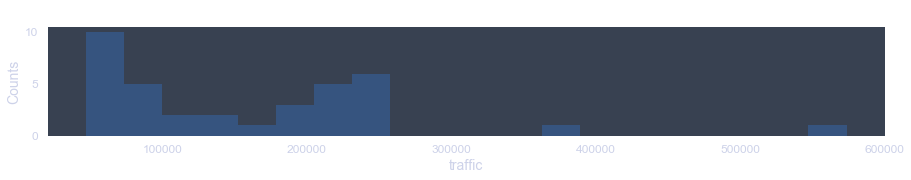

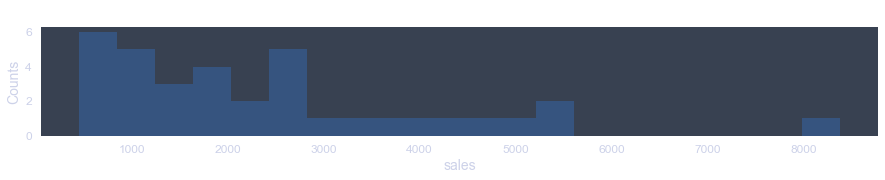

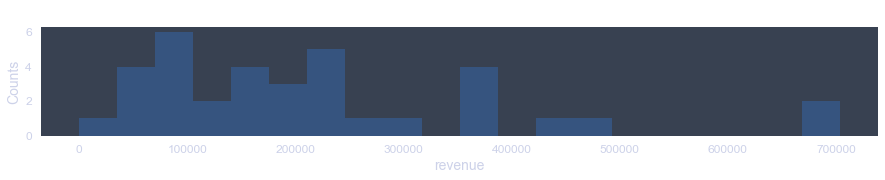

In [15]:
for col in ['traffic', 'sales', 'revenue']:
    plt.figure(figsize=(15,2))
    sns.distplot(data[col], kde=False, bins=20)
    plt.ylabel('Counts'), plt.title(col)

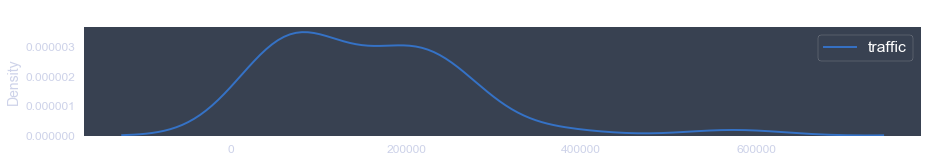

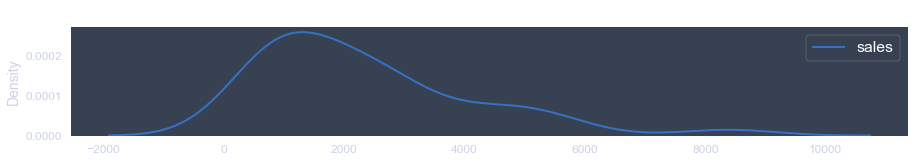

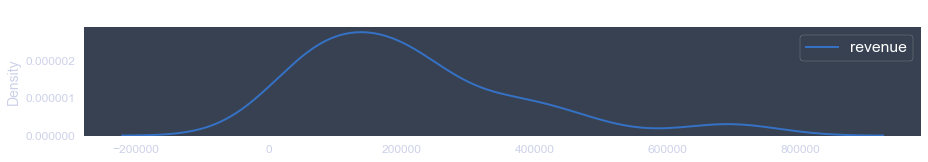

In [16]:
for col in ['traffic', 'sales', 'revenue']:
    plt.figure(figsize=(15,2))
    sns.kdeplot(data[col])
    plt.ylabel('Density'), plt.title(col)

## Revenue

In [17]:
data.index[0], data.index[-1], 

(Timestamp('2015-05-31 00:00:00'), Timestamp('2018-05-31 00:00:00'))

In [18]:
traces=[]

traces.append(go.Scatter(x=data.date, y=data.revenue, mode='lines'))

layout = dict(
    title='Sales Revenue History(May 2015-May-2018)',
    yaxis=dict(title='Revenue'), showlegend=False, xaxis=dict(title='Month'))

fig = dict(data=traces, layout=layout)
iplot(fig)

There are 2 obvious outliers happened in Feb 2016 and Nov 2017. These two peaks seems no seasonabe pattern. An investigation is necessary to understand the reason behind, whether it's because of a aggresive price promotion or some special day.

The overall trend is growing. 

Some notable point: in Jul 2016, the revenue is 0 which is possibly a input mistake.

In [19]:
monthly_revenue = data.groupby('month')['revenue'].agg('sum').reset_index()

traces=[]

traces.append(go.Bar(x=monthly_revenue.month, y=monthly_revenue.revenue))

layout = dict(
    title='Accumulated Sales Revenue by Month (May 2015-May-2018)',
    yaxis=dict(title='Revenue'), showlegend=False, xaxis=dict(title='Month'))

fig = dict(data=traces, layout=layout)
iplot(fig)

Sales peaks happen in Feb, Nov, May,  Apr and Dec. 

However, Feb and Nov are the two months with outliers, we assume May, Apr and Dec are the common months for high revenue months

## Sales

In [20]:
traces=[]

traces.append(go.Scatter(x=data.date, y=data.sales, mode='lines'))

layout = dict(
    title='Sales History (May 2015-May-2018)',
    yaxis=dict(title='Sales'), showlegend=False, xaxis=dict(title='Date'))

fig = dict(data=traces, layout=layout)
iplot(fig)

NaN was detected in Feb, Mar of 2017.
Similar to the revenue, extreme high sales was found in Nov 2017.

However, Feb 2016 does not seen a  high sales which might mean that some extreme high unit-price products werre sold during that period or there was some human error happened(vs low traffic). 

In [21]:
monthly_sales = data.groupby('month')['sales'].agg('sum').reset_index()

traces=[]

traces.append(go.Bar(x=monthly_sales.month, y=monthly_sales.sales))

layout = dict(
    title='Accumulated Sales by Month  (May 2015-May-2018)',
    yaxis=dict(title='Sales'), showlegend=False, xaxis=dict(title='Month'))

fig = dict(data=traces, layout=layout)
iplot(fig)

High sales months: Apr, May and Nov

## Traffic

In [22]:
traces=[]

traces.append(go.Scatter(x=data.date, y=data.traffic, mode='lines'))

layout = dict(
    title='Traffic History (May 2015-May-2018)',
    yaxis=dict(title='Revenue'), showlegend=False, xaxis=dict(title='Month'))

fig = dict(data=traces, layout=layout)
iplot(fig)

Nov 2017: sales, revenue and traffic share the same pattern which means it was possibly an aggressive market promotion. Outlier of revenue in Feb 2016 could be something unusual.

In [23]:
monthly_traffic = data.groupby('month')['traffic'].agg('sum').reset_index()


traces=[]

traces.append(go.Bar(x=monthly_traffic.month, y=monthly_traffic.traffic))

layout = dict(
    title='Traffic by Month',
    yaxis=dict(title='Traffic'), showlegend=False, xaxis=dict(title='Month'))

fig = dict(data=traces, layout=layout)
iplot(fig)

Jun to Oct are the low sales months

## Unit Price

In [24]:
traces=[]

traces.append(go.Scatter(x=data.date, y=data.avg_price, mode='lines'))

layout = dict(
    title='Average Unit Price',
    yaxis=dict(title='Average Unit Price'), showlegend=False, xaxis=dict(title='Date'))

fig = dict(data=traces, layout=layout)
iplot(fig)

## Correlation (Bivariate)

In common usage it most often refers to how close two variables are to having a linear relationship with each other. 

In [25]:
traces=[]

traces.append(go.Scatter(x=data.traffic, y=data.revenue, mode='markers'))

layout = dict(
    title='Traffic vs Revenue',
    yaxis=dict(title='Revenue'), showlegend=False, xaxis=dict(title='Traffic'))

fig = dict(data=traces, layout=layout)
iplot(fig)

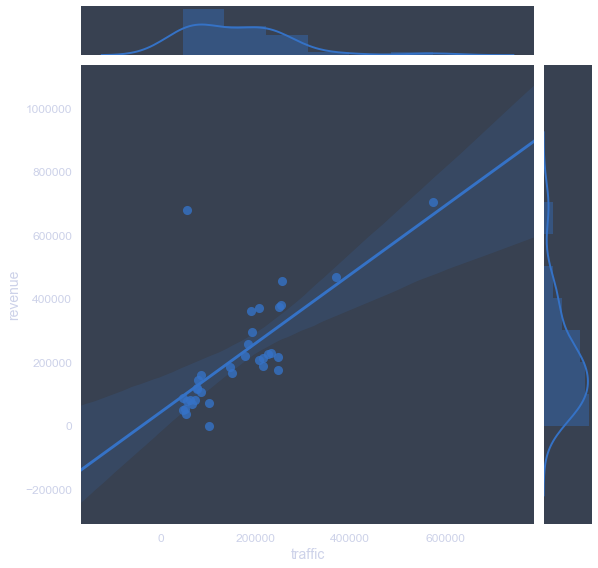

In [26]:
sns.jointplot(x=data.traffic, y=data.revenue, data=data,kind="reg", ratio=8, height=8)

In [27]:
traces=[]

traces.append(go.Scatter(x=data.sales, y=data.revenue, mode='markers'))

layout = dict(
    title='Sales vs Revenue',
    yaxis=dict(title='Revenue'), showlegend=False, xaxis=dict(title='Sales'))

fig = dict(data=traces, layout=layout)
iplot(fig)

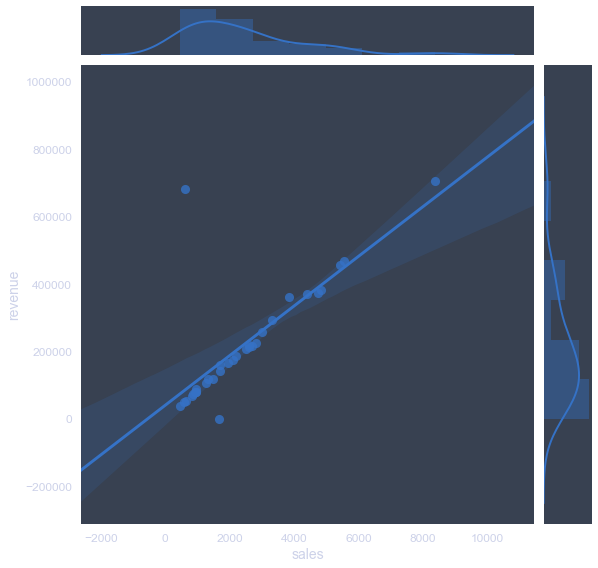

In [28]:
sns.jointplot(x=data.sales, y=data.revenue, data=data,kind="reg", ratio=8, height=8)

In [29]:
traces=[]

traces.append(go.Scatter(x=data.sales, y=data.traffic, mode='markers'))

layout = dict(
    title='Sales vs Traffic',
    yaxis=dict(title='Sales'), showlegend=False, xaxis=dict(title='Traffic'))

fig = dict(data=traces, layout=layout)
iplot(fig)

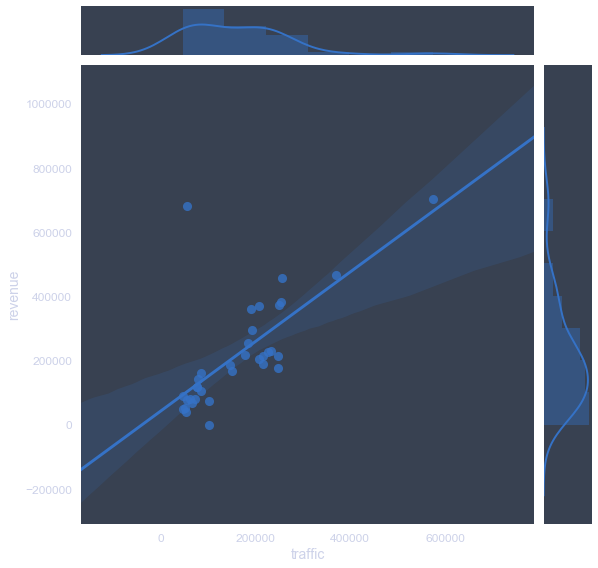

In [30]:
sns.jointplot(x=data.traffic, y=data.revenue, data=data,kind="reg", ratio=8, height=8)

Text(156.9, 0.5, '')

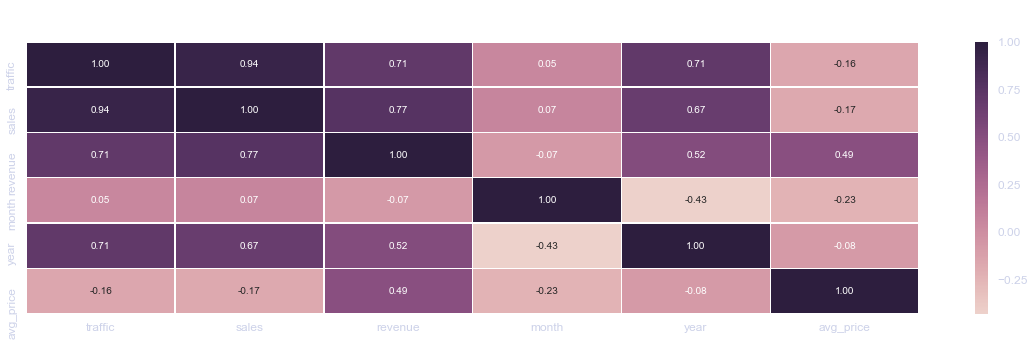

In [31]:
corrmat = data.corr()

f, ax = plt.subplots(figsize = (20,5))
cmap = sns.cubehelix_palette(as_cmap=True)
f=sns.heatmap(corrmat, annot=True, fmt='.2f', linewidths =.5, cmap=cmap,  annot_kws={'size': 10}, ax=ax)
ax.set_title("Correlation Heatmap",fontsize=20, pad=20)#pad is the v-distance
ax.set_xlabel("",fontsize=30)
ax.set_ylabel("",fontsize=30)

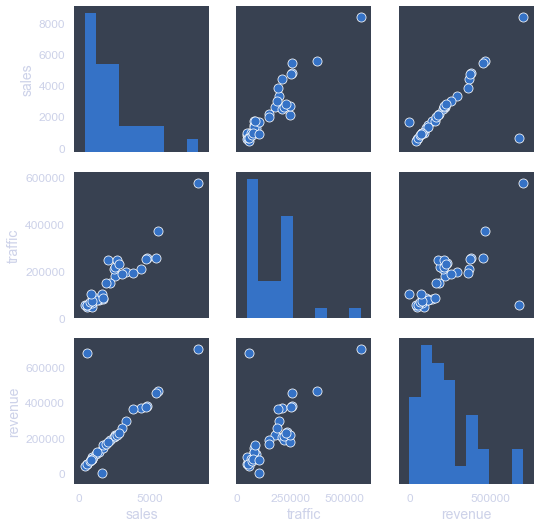

In [32]:
sns.pairplot(data, vars=['sales', 'traffic', 'revenue'])

Comments: if we have categorical variables such as product groups or customer groups, we can analyze multivariate relationship

# Outliers

In [33]:
def outlier_report(data):
    print(data.name+' '+'outliers:')
    #drop the NAN first
    data=data.dropna()
    # calculate interquartile range
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.2f, 75th=%.2f, IQR=%.2f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Upper Cut Off: {}, Lower Cut Off: {}'.format(upper, lower))
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print("Total percentual of Outliers: {:.2%}". format(round((len(outliers) / len(data)),4))) 

In [34]:
outlier_report(data.revenue)
print('\n')
outlier_report(data.sales)
print('\n')
outlier_report(data.traffic)

revenue outliers:
Percentiles: 25th=84209.10, 75th=274562.83, IQR=190353.73
Upper Cut Off: 560093.4175, Lower Cut Off: -201321.48250000004
Identified outliers: 2
Non-outlier observations: 33
Total percentual of Outliers: 5.71%


sales outliers:
Percentiles: 25th=941.50, 75th=2966.00, IQR=2024.50
Upper Cut Off: 6002.75, Lower Cut Off: -2095.25
Identified outliers: 1
Non-outlier observations: 33
Total percentual of Outliers: 2.94%


traffic outliers:
Percentiles: 25th=71185.75, 75th=219632.57, IQR=148446.82
Upper Cut Off: 442302.7926875, Lower Cut Off: -151484.47561249998
Identified outliers: 1
Non-outlier observations: 35
Total percentual of Outliers: 2.78%


In [35]:
def drop_outliers(data, var):
    # Calculate first and third quartile
    first_quartile = data[var].describe()['25%']
    third_quartile = data[var].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    df = data[(data[var] > (first_quartile - 1.5 * iqr)) &
                    (data[var] < (third_quartile + 1.5 * iqr))]
    print('Before dropping the outliers: {}'.format(len(data)))
    print('After dropping the outlers: {}'.format(len(df)))
    return df

In [36]:
data = drop_outliers(data, 'sales')
data = drop_outliers(data, 'revenue')
data = drop_outliers(data, 'traffic')

Before dropping the outliers: 36
After dropping the outlers: 33
Before dropping the outliers: 33
After dropping the outlers: 31
Before dropping the outliers: 31
After dropping the outlers: 31


In [37]:
data = drop_outliers(data, 'revenue')
data = drop_outliers(data, 'sales')
data = drop_outliers(data, 'traffic')

Before dropping the outliers: 31
After dropping the outlers: 31
Before dropping the outliers: 31
After dropping the outlers: 31
Before dropping the outliers: 31
After dropping the outlers: 31


In [38]:
outlier_report(data.revenue)
print('\n')
outlier_report(data.sales)
print('\n')
outlier_report(data.traffic)

revenue outliers:
Percentiles: 25th=79866.64, 75th=240174.85, IQR=160308.21
Upper Cut Off: 480637.17, Lower Cut Off: -160595.67
Identified outliers: 0
Non-outlier observations: 31
Total percentual of Outliers: 0.00%


sales outliers:
Percentiles: 25th=943.00, 75th=2917.00, IQR=1974.00
Upper Cut Off: 5878.0, Lower Cut Off: -2018.0
Identified outliers: 0
Non-outlier observations: 31
Total percentual of Outliers: 0.00%


traffic outliers:
Percentiles: 25th=74927.50, 75th=212218.08, IQR=137290.58
Upper Cut Off: 418153.94, Lower Cut Off: -131008.364
Identified outliers: 0
Non-outlier observations: 31
Total percentual of Outliers: 0.00%


# Missing Values

In [39]:
#replace the zero revenue to nan
data.revenue = data.revenue.replace(0.00, np.nan)

In [40]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [41]:
missing_values_table(data)

Your selected dataframe has 7 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
revenue,1,3.2


In [42]:
data[data.isnull().any(axis=1)].head()

,date,traffic,sales,revenue,month,year,avg_price
date,,,,,,,
2016-07-31,2016-07-31,101697.0,1658.0,NaN,7,2016,0.0


In [43]:
#imput the revenue by multiplying average unit price and sales
data.revenue.fillna(np.mean(data.avg_price)*data.sales, inplace=True)

In [44]:
#imput the revenue by dividing the revenue and average unit price
data.sales.fillna(data.revenue/np.mean(data.avg_price), inplace=True)

In [45]:
#imput the revenue by dividing the revenue and sales
data.avg_price.fillna(data.revenue/data.sales, inplace=True)

In [46]:
missing_values_table(data)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# EDA Summary 

In [47]:
data.head()

,date,traffic,sales,revenue,month,year,avg_price
date,,,,,,,
2015-07-31,2015-07-31,56972.0,923.0,77647.48,7,2015,84.125114
2015-08-31,2015-08-31,46750.0,594.0,49415.73,8,2015,83.191465
2015-09-30,2015-09-30,47378.0,943.0,88097.31,9,2015,93.422386
2015-10-31,2015-10-31,53297.0,453.0,37732.41,10,2015,83.294503
2015-11-30,2015-11-30,85670.0,1251.0,105078.20,11,2015,83.995364


In [48]:
df_=data.copy()

# Training the Model with XGBoost

In [49]:
#split the data
X= data.drop(columns=['revenue', 'date', 'avg_price'])
y = data['revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

## Loading Data into Dmatrices

In [50]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

## Building a Baseline

In [51]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)

# Get predictions on the test set, assume the average revenue is the prediction
baseline_predictions = np.ones(len(y_test)) * mean_train

# Compute RMSE
from sklearn import metrics
rmse_baseline = np.sqrt(metrics.mean_squared_error(y_test, baseline_predictions))

print("Baseline RMSE is {:.2f}".format(rmse_baseline))

Baseline RMSE is 26586.06


## Start with a basic XGB Model

In [52]:
#basic params dict
params = {
    # Parameters that we are going to tune.
    'max_depth':6, #Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
    'min_child_weight': 1, #Minimum sum of instance weight (hessian) needed in a child
    'eta':.3, #learning rate
    'subsample': 1,#Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. 
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [53]:
#adding the metics to the dict
params['eval_metric'] = "rmse"
#the maximum boosting rounds
num_boost_round = 999

In [54]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	Test-rmse:126434
Will train until Test-rmse hasn't improved in 10 rounds.
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[1]	Test-rmse:91841.4
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[2]	Test-rmse:69044.9
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[3]	Test-rmse:49609.9
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[4]	Test-rmse:35737.9
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[5]	Test-rmse:25305.4
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[6]	Test-rmse:15770.8
[12:39:20] s

In [55]:
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 1507.28 with 10 rounds


## Start the CV

In [56]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=2,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,166382.156250,40433.312500,173601.691406,53472.558594
1,127944.765625,28570.109375,136681.066406,54342.589844
2,99059.457032,19589.714843,111602.722657,50976.042968
3,77685.851562,13347.210938,92490.919922,46774.376953
4,61709.978515,8846.740235,78164.789062,43106.867188
5,49722.261719,5883.578125,69014.078125,41288.453125
6,40180.312500,3597.695312,62246.416015,39376.958985
7,32637.010742,1939.243164,57955.072265,36710.943360
8,26644.205078,761.361328,55210.558593,34118.519532
9,21799.193360,29.644532,53291.314453,31169.037109


In [57]:
print('Minimum RMSE: {:.2f}'.format(cv_results['test-rmse-mean'].min()))

Minimum RMSE: 45916.52


## Tune max_depth and min_child_weight

max_depth:

The maximum depth of a tree, same as GBM.

Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

Should be tuned using CV.

Typical values: 3-10

min_child-weight:
Defines the minimum sum of weights of all observations required in a child.

This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.

Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
Too high values can lead to under-fitting hence, it should be tuned using CV.

In [58]:
gridsearch_params = [(max_depth, min_child_weight)
                     for max_depth in range(9, 12)
                     for min_child_weight in range(5, 8)]

In [59]:
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=2,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    
    # Update best RMSE
    rmse_mean = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse_mean, boost_rounds))
    if rmse_mean < min_rmse:
        min_rmse = rmse_mean
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 ex

[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
	RMSE 80873.2753905 for 17 rounds
CV with max_depth=10, min_child_weight=7
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:

[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [60]:
#update the dict
params['max_depth'] = 9
params['min_child_weight'] = 5

## Tune subsample and colsample_bytree

subsample:

Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.

Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

Typical values: 0.5-1

colsample_bytree:

Similar to max_features in GBM.

Denotes the fraction of columns to be randomly samples for each tree.

Typical values: 0.5-1

In [61]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [62]:
min_rmse = float("Inf")
best_params = None

In [63]:
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=2,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra

[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
	RMSE 75035.1542965 for 12 rounds
CV with subsample=0.9, colsample=0.8
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: 

[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [64]:
#update the dictionary
params['subsample'] = 0.8
params['colsample_bytree'] = 1.

## Tune ETA

In [65]:
%time
# This can take some time…
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=2,metrics=['rmse'],early_stopping_rounds=10)
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs
CV with eta=0.3
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.

[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

CPU times: user 115 ms, sys: 34.3 ms, total: 149 ms
Wall time: 123 ms
	RMSE 73612.175781 for 104 rounds

CV with eta=0.01
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, ma

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [66]:
#update the params dict
params['eta'] = .1

In [67]:
params

{'max_depth': 9,
 'min_child_weight': 5,
 'eta': 0.1,
 'subsample': 0.8,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

## Results

In [68]:
params={'colsample_bytree': 1.0,
 'eta': 0.3,
 'eval_metric': 'rmse',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 0.7}

In [69]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	Test-rmse:128084
Will train until Test-rmse hasn't improved in 10 rounds.
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[1]	Test-rmse:91767.4
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	Test-rmse:68589.1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	Test-rmse:42293.1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[4]	Test-rmse:8712.84
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	Test-rmse:2125.34
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[6]	Test-rmse:4340.17
[12:39:23] sr

In [70]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 2125.34 in 6 rounds


## Final Evaluation

In [71]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	Test-rmse:128084
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[1]	Test-rmse:91767.4
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	Test-rmse:68589.1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	Test-rmse:42293.1
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[4]	Test-rmse:8712.84
[12:39:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	Test-rmse:2125.34


In [72]:
# Predict
y_pred = best_model.predict(dtest)

from sklearn import metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 1575.606249999997
MSE: 4517109.223264039
RMSE: 2125.3492003113365


In [73]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [74]:
mean_absolute_percentage_error(y_test, y_pred)

0.723652540548767

## Feature Importance

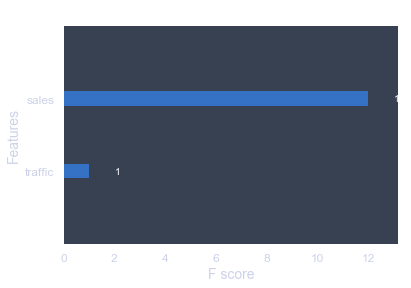

In [75]:
xgb.plot_importance(best_model, height=0.2)

## Save the Model

In [76]:
best_model.save_model("artefact.model")

## Load the Model

In [77]:
loaded_model = xgb.Booster()
loaded_model.load_model("artefact.model")

In [78]:
#loaded_model.predict(dtest)

## Predict the Future

In [79]:
date=pd.date_range('May 2018','June 2019',freq='M')
df=pd.DataFrame({'month':date.month,'year':date.year})
df

,month,year
0,5,2018
1,6,2018
2,7,2018
3,8,2018
4,9,2018
5,10,2018
6,11,2018
7,12,2018
8,1,2019
9,2,2019


In [80]:
df['traffic'] =np.nan
df['sales']=np.nan

In [81]:
df=df[['traffic', 'sales', 'month', 'year']]

In [82]:
dtest = xgb.DMatrix(df)

In [83]:
best_model.predict(dtest)

array([47611.17, 47611.17, 47611.17, 47611.17, 47611.17, 47611.17,
       47611.17, 47611.17, 47611.17, 47611.17, 47611.17, 47611.17,
       47611.17], dtype=float32)

# FB Prophet

Prophet is an additive model to represent a time-series as a combination of patterns at different scales such as daily, weekly, seasonally, and yearly, along with an overall trend.

In [84]:
from fbprophet import Prophet

date
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2016-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: revenue, dtype: object

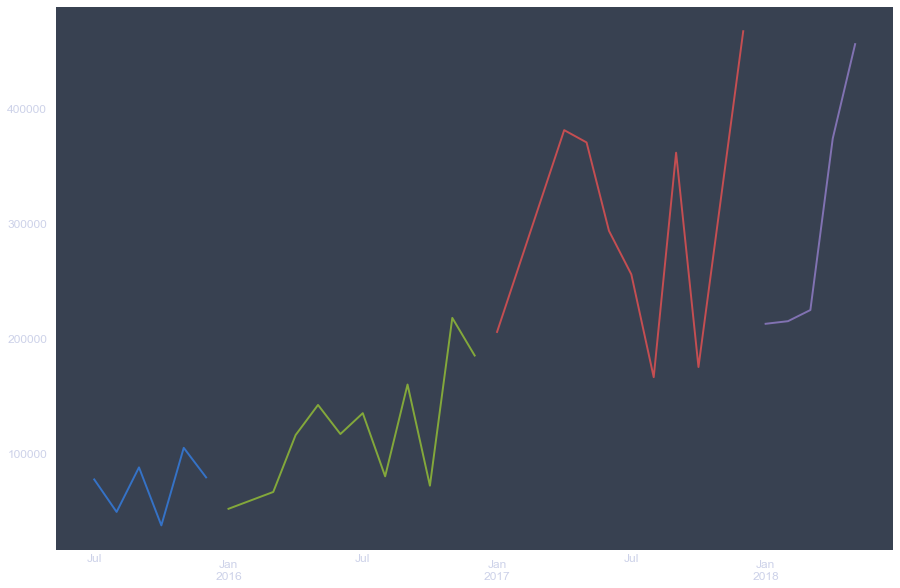

In [85]:
df_['revenue'].resample('y').plot(figsize=(15,10))

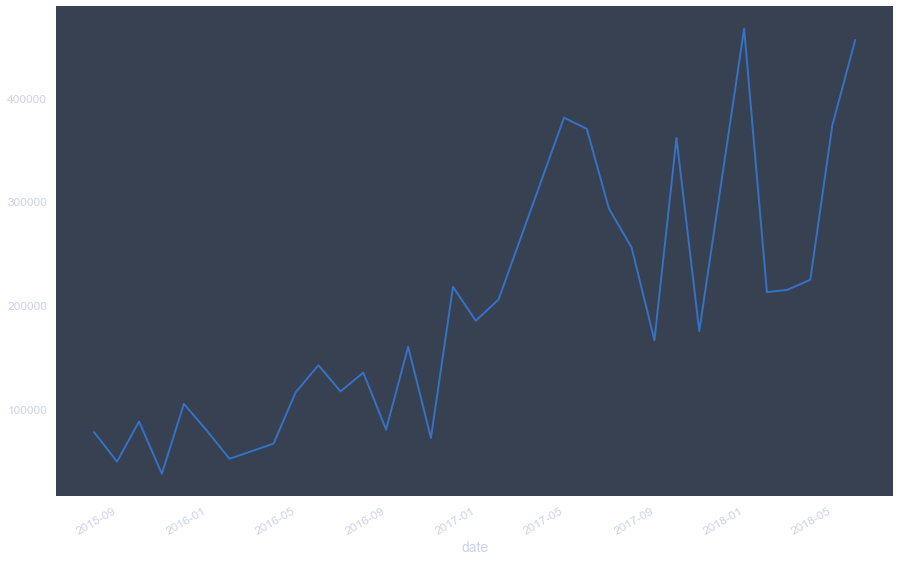

In [86]:
df_['revenue'].plot(figsize=(15,10))

In [87]:
df=df_[['date', 'revenue']]
#normalize the data by log
df['revenue']=np.log(df['revenue'])
df.columns=['ds', 'y']

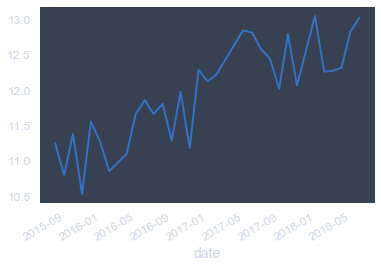

In [88]:
df['y'].plot()

In [89]:
m=Prophet(changepoint_prior_scale=0.05) #default changepoint_prior_scale=0.05, the higher the more sensitivity
m.fit(df)

future = m.make_future_dataframe(freq='m', periods=12)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.
/Users/zakkyang/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



,ds,yhat,yhat_lower,yhat_upper
38,2019-01-31,12.450580,12.309950,12.603997
39,2019-02-28,12.703280,12.547820,12.859626
40,2019-03-31,12.454991,12.283299,12.623150
41,2019-04-30,13.048357,12.866365,13.248554
42,2019-05-31,13.190234,12.990008,13.410497


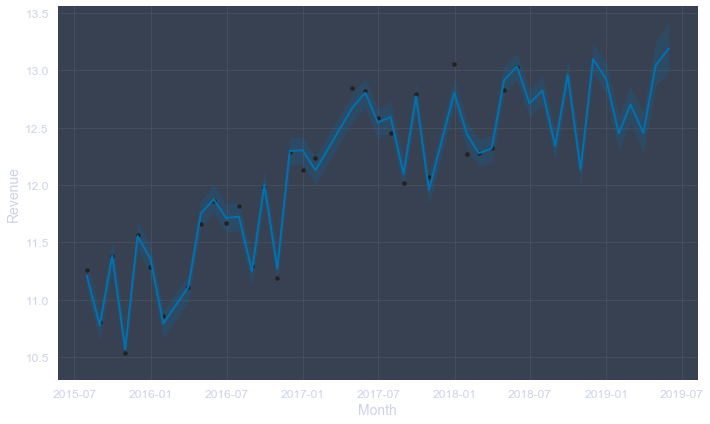

In [90]:
fig = m.plot(forecast, xlabel = 'Month', ylabel = 'Revenue')

In [91]:
#changepoints represent when the time series growth rate significantly changes
m.changepoints

1    2015-08-31
2    2015-09-30
3    2015-10-31
4    2015-11-30
5    2015-12-31
6    2016-01-31
7    2016-03-31
8    2016-04-30
9    2016-05-31
10   2016-06-30
11   2016-07-31
12   2016-08-31
13   2016-09-30
14   2016-10-31
15   2016-11-30
16   2016-12-31
17   2017-01-31
18   2017-04-30
19   2017-05-31
20   2017-06-30
21   2017-07-31
22   2017-08-31
23   2017-09-30
Name: ds, dtype: datetime64[ns]

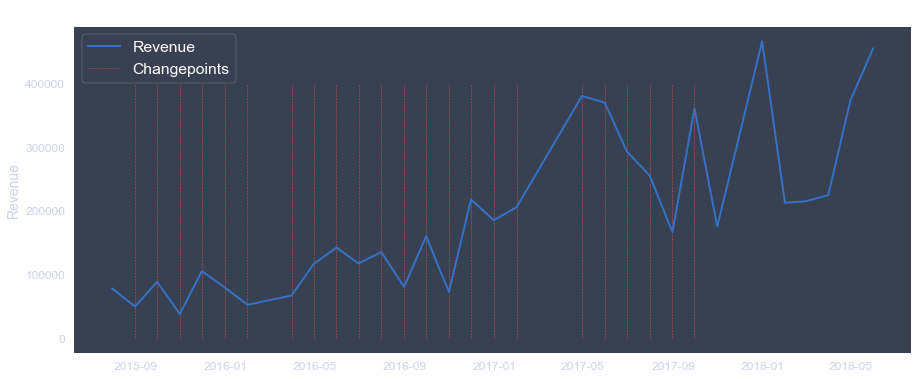

In [92]:
changepoints = [str(date) for date in m.changepoints]

# Plot the search frequency
plt.figure(figsize=(15, 6))
plt.plot(df_['date'], df_['revenue'], label = 'Revenue')
# Plot the changepoints
plt.vlines(changepoints, ymin = 0, ymax= 400000, colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')
# Formatting of plot
plt.grid('off'); plt.ylabel('Revenue'); plt.legend()
plt.title('Revenue and Changepoints');

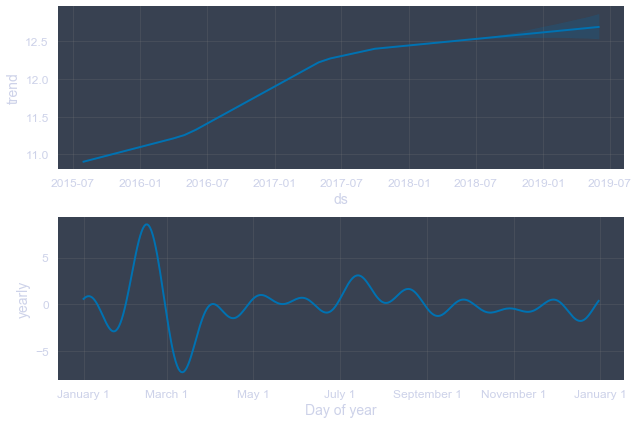

In [93]:
m.plot_components(forecast);

Trend: the revenue is rising and will keep rising

Yearly pattern indicate that Feb experiences a significant growth while Mar will decline to the bottom after Feb. The other months will keep constant.

In [94]:
history = go.Scatter(
    x=df['ds'],
    y=df['y'],
    mode='lines',
    marker=dict(size=4, showscale=False),
    text=df['ds'],
    name='Sales History',
    showlegend=True)

sales_forecast = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    marker=dict(size=4, showscale=False),
    name='Sales Forecast',
    text=forecast['ds'],
    showlegend=True)

sales_forecast_upper = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    marker=dict(size=4, showscale=False),
    name='Sales Forecast(upper)',
    showlegend=True)

sales_forecast_lower = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    marker=dict(size=4, showscale=False),
    name='Sales Forecast(lower)',
    showlegend=True)

data = [history, sales_forecast, sales_forecast_upper, sales_forecast_lower]

layout = dict(
    title='Sales History and Forecast',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Revenue'), showlegend=True)
fig = dict(data=data, layout=layout)
iplot(fig)

## Evaluation

Here we do cross-validation to assess prediction performance on a horizon of 30 days, starting with 360 days of training data in the first cutoff and then making predictions every 180 days. 

In [95]:
from fbprophet.diagnostics import cross_validation
#initial=the day after the first day, period=sample period, horizon=every singe sample period 
df_cv = cross_validation(m , initial='360 days', period='30 days' ,horizon = '30 days')
df_cv.head()

INFO:fbprophet.diagnostics:Making 19 forecasts with cutoffs between 2016-08-04 00:00:00 and 2018-05-01 00:00:00
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 9.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 10.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 12.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 13.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 14.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-31,11.003206,10.997269,11.009887,11.293785,2016-08-04
1,2016-09-30,10.311158,10.311091,10.311214,11.983083,2016-09-03
2,2016-10-31,11.000761,10.993806,11.008715,11.187211,2016-10-03
3,2016-11-30,12.507684,12.482024,12.533378,12.291638,2016-11-02
4,2016-12-31,11.863284,11.845910,11.877587,12.129096,2016-12-02


In [96]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,coverage
6,26 days,0.073370,0.270869,0.270869,0.021079,0.0
0,27 days,0.084436,0.290579,0.290579,0.025729,0.0
1,27 days,2.795333,1.671925,1.671925,0.139524,0.0
8,27 days,0.821580,0.906410,0.906410,0.071997,0.0
7,27 days,0.513917,0.716880,0.716880,0.055911,0.0
15,28 days,0.527146,0.726048,0.726048,0.059132,0.0
9,28 days,0.241375,0.491299,0.491299,0.039457,0.0
3,28 days,0.046676,0.216047,0.216047,0.017577,0.0
2,28 days,0.034764,0.186450,0.186450,0.016666,0.0
4,29 days,0.070656,0.265812,0.265812,0.021915,0.0


## Output

In [97]:
s=pd.date_range('June 2018','June 2019',freq='M')
output=pd.DataFrame({'month':s.month,'year':s.year})

In [98]:
output

,month,year
0,6,2018
1,7,2018
2,8,2018
3,9,2018
4,10,2018
5,11,2018
6,12,2018
7,1,2019
8,2,2019
9,3,2019


In [99]:
yhat=forecast[forecast['ds']>='2018-05-31']['yhat']
yhat=np.exp(yhat)

In [100]:
yhat=yhat.reset_index()

In [101]:
output.to_csv('output.csv', index=False)